Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be: what is a folds approach?  

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
 
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

Record your work and reflections in a notebook to discuss with your mentor.



Lasso and ridge regression are better than logistic and ols working on the problem of over fitting. When using these they are more generalized. Ridge uses the absolute. Lasso used the square root reduced the number of the model parameters by reducing to 0 one is L1 and another is L2. 

In [8]:
import math
import warnings
import time

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.formula.api as smf
import scipy as sp
from scipy.stats import boxcox
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [9]:
#2013 data
ny = pd.read_excel("/Users/bradleyrhyins/Desktop/Thinkful-Projects/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", sep=r'\\t')
nj = pd.read_excel("/Users/bradleyrhyins/Downloads/table_8_offenses_known_to_law_enforcement_new_jersey_by_city_2013.xls", sep=r'\\t')
ct = pd.read_excel("/Users/bradleyrhyins/Downloads/table_8_offenses_known_to_law_enforcement_connecticut_by_city_2013.xls", sep=r'\\t')

In [10]:
#get rid of nans
nj.fillna(0, inplace=True)

In [11]:
nj.columns

Index(['City', 'Population', 'Violent\ncrime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [12]:
nj["Robbery"] = [1 if x > 0 else 0 for x in nj["Robbery"]]
nj["Propertycrime"] = [1 if x > 0 else 0 for x in nj["Murder"]]
nj["Burglary"] = [1 if x > 0 else 0 for x in nj["Burglary"]]

In [13]:
nj["MurderBurglary"] = [x*y for x, y in zip(nj["Robbery"], nj["Burglary"])]

In [14]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
#use this format for formatting sample examples in course material
Y = nj['Propertycrime'].values.reshape(-1, 1)
X = nj[['Population','Robbery','Burglary','MurderBurglary', 'Aggravated\nassault']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 6.27871613e-06 -2.59435338e-02  9.83338406e-03  1.12647493e-01
   1.53759285e-04]]

Intercept: 
 [-0.00524899]

R-squared:
0.23803771305522603


In [16]:
nj["logPop"] = [0 if x == 0 else np.log(x) for x in nj["Population"]]
nj["logRob"] = [0 if x == 0 else np.log(x) for x in nj["Robbery"]]
nj["logBur"] = [0 if x == 0 else np.log(x) for x in nj["Burglary"]]
nj["logMB"] = [0 if x == 0 else np.log(x) for x in nj["MurderBurglary"]]

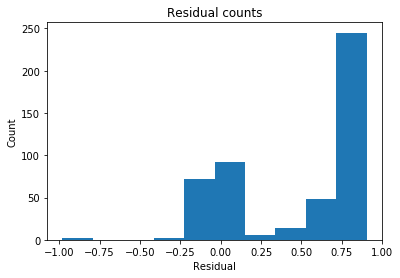

In [19]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = nj['MurderBurglary']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Ridge Regression

### Lasso Regression